# 퍼셉트론

## # 01. 퍼셉트론의 이해

  - 인공신경망(딥러닝)의 기원이 되는 알고리즘.
  - 하나 이상의 신호를 입력받아 어떠한 계산을 수행한 후 하나의 Output를 출력한다.
  - 퍼셉트론은 `1`과 `0`의 신호만 가질 수 있다.
  - 신호가 흐르면 `1`, 흐르지 않으면 `0` 이다.

### 1) input이 2개인 퍼셉트론

  -$x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$는 가충치를 의미한다. ($w$ : weight)
  - $**x$와 가중치 $w$를 곱한 값을 모두 더하여 하나의 값($y$)로 만들어 낸다.**
  - 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값($y$)이 어떠한 임계값(θ)을 넘을 때만 1로 출력한다.
  - 신경망에서 만들어진 값($y$)을 적절한 출력값으로 변환해 주는 함수를 **활성화 함수**라고 한다.
  - 입력 신호와 출력 신호를 담고있는 원은 **노드** 혹은 **뉴런**이라 부른다.

![퍼셉트론](res/per.png)

#### y를 수식으로 나타내기

$$y = \left \{ \begin{array}{cc} {0(w_1x_1 + w_2x_2 \leq \theta)}\\{1(w_1x_1 + w_2x_2 > \theta)}\end{array} \right.$$

### 2) 논리회로

  - 논리 연산을 통해 전기 장치를 제어하는 통로.
  - 컴퓨터 및 기타 전기 장치를 작동하게 만드는 기본 부품이다.
  - 불 대수를 이용하여 설계
  - 여러 입력을 해도 1개의 출력만 나온다.

![논리회로](res/logic.png)

### 3) 게이트

  - 논리 회로의 기초 구성요소.
  - 각 게이트는 논리 연산 하나를 구현한다.

![게이트](res/gate.jpg)

#### 게이트의 종류

![게이트의 종류](res/gate2.png)

퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다.

## # 02. 퍼셉트론 구현하기

### 1) 패키지 참조하기

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

### 2) AND 게이트

#### (1) 데이터 셋 준비하기

랜덤 시드값 고정

In [2]:
np.random.seed(777)

데이터 셋 구성

In [3]:
train_x = np.array([[0,0], [1,0],[0,1],[1,1]])
train_y = np.array([[0], [0], [0], [1]])

#### (3) 데이터 전처리

  - 간단한 데이터 이므로 이 예제에서는 수행하지 않는다.

#### (4) 탐색적 데이터 분석

In [5]:
# flatten : 무조건 1차원으로 풀어버린다.
label = train_y.flatten()
df = DataFrame(train_x, index = label, columns = ['x1','x2'])
df.columns.name = 'y'
df

y,x1,x2
0,0,0
0,1,0
0,0,1
1,1,1


#### (5) 데이터 셋 분할하기

  > 훈련을 위한 데이터 자체가 양이 적기 때문에 여기서는 진행하지 않음

#### (6) 모델 개발

모델 정의

In [9]:
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = "linear"))
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [10]:
hist = model.fit(train_x, train_y, epochs = 500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs', inplace = True)
result_df

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1.9433 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 1.8484 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1.7593 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1.6756 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5970 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 1.5232 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1.4539 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 1.3888 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 1.3276 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 1.2701 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 1.2161 

,loss,acc
epochs,,
1,1.943321,0.75
2,1.848408,0.75
3,1.759294,0.75
4,1.675617,0.75
5,1.597036,0.75
...,...,...
496,0.079232,1.00
497,0.079127,1.00
498,0.079021,1.00


#### (7) 학습 결과 평가

평가결과 시각화

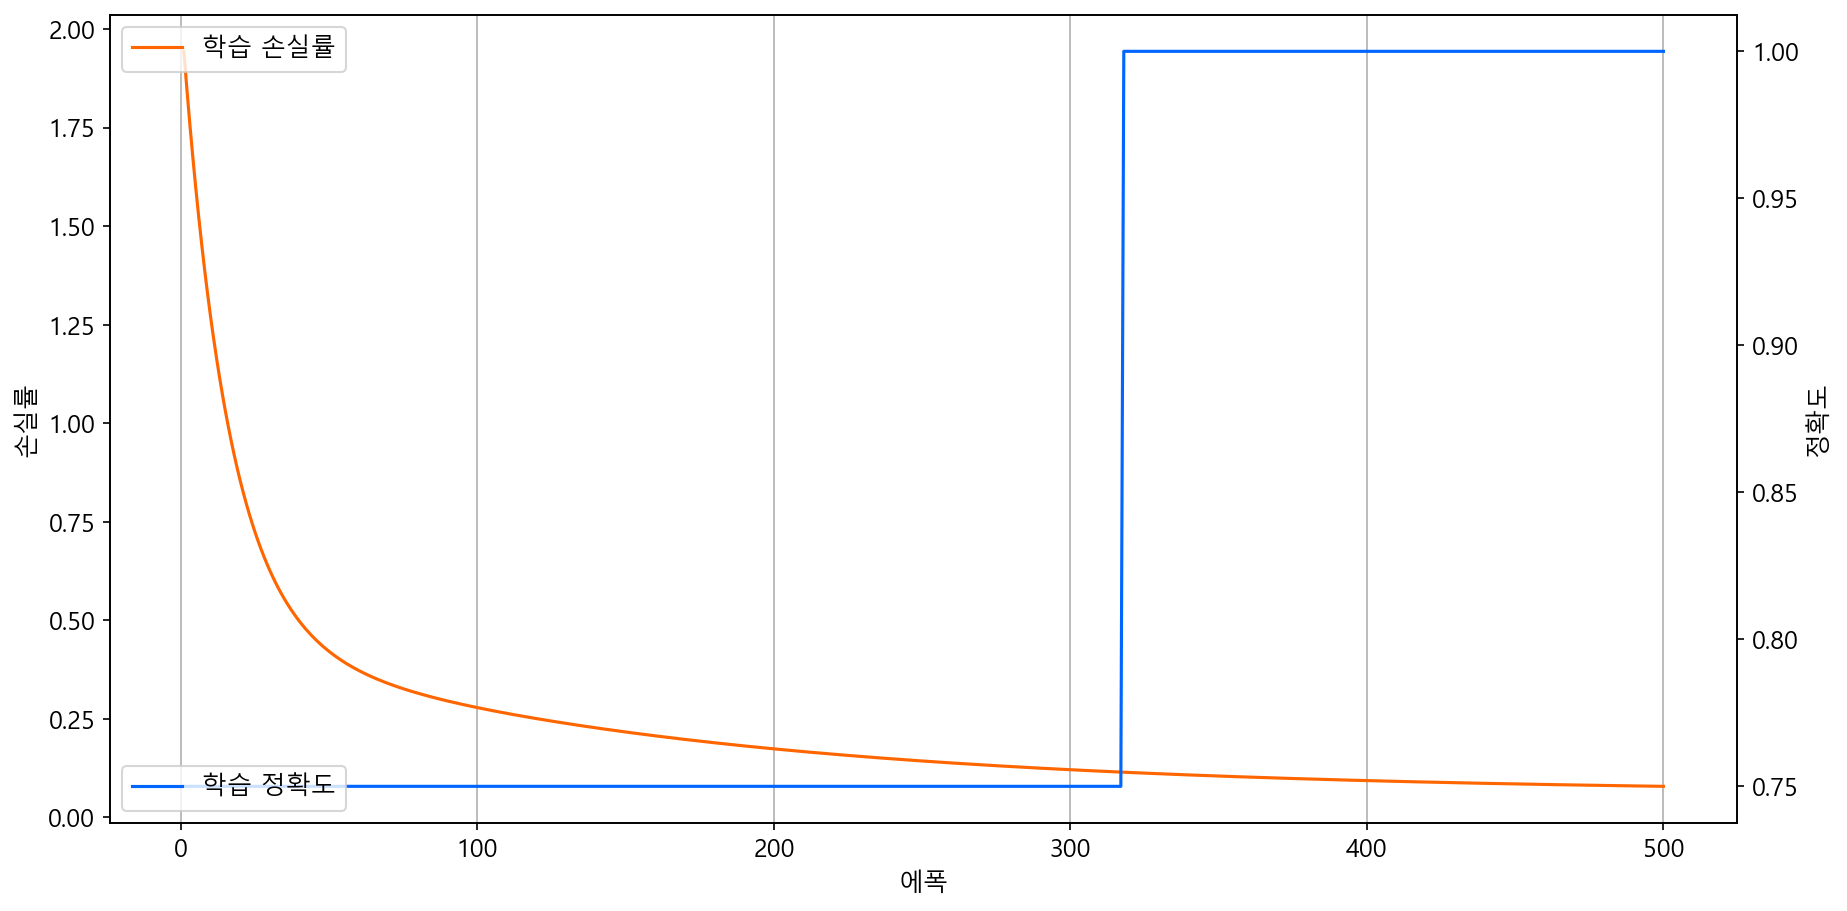

In [11]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

모델 성능 평가

In [36]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0]*100, ev[1]*100))

1/1 [==============================] - 0s 19ms/step - loss: 0.0787 - acc: 1.0000
손실률: 7.87%, 정확도: 100.00%


가중치, 편향 확인

In [13]:
weight, bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.35079545 0.3039254 ]
편향: [-0.04522531]


#### (8) 학습 결과 적용

단일 데이터에 대한 예측치 산정

In [15]:
r00 = model.predict([[0,0]])
r00

1/1 [==============================] - 0s 76ms/step


array([[-0.04522531]], dtype=float32)

In [16]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

학습 데이터 전체를 활용하여 예측값 만들기

In [17]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 18ms/step


array([[-0.04522531],
       [ 0.30557013],
       [ 0.25870007],
       [ 0.6094955 ]], dtype=float32)

In [18]:
df['예측값'] = r.reshape(-1).round()
df

y,x1,x2,예측값
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


### 3) OR 게이트

#### (1) 데이터 셋 준비하기

랜덤 시드값 고정

In [19]:
np.random.seed(777)

데이터 셋 구성

In [20]:
tx = np.array([[0,0], [1,0],[0,1],[1,1]])
ty = np.array([[0], [1], [1], [1]])

#### (3) 데이터 전처리 생략
#### (4) 탐색적 데이터 분석

In [21]:
lab = ty.flatten()
of = DataFrame(tx, index = lab, columns = ['x1', 'x2'])
of.columns.name = 'y'
of

y,x1,x2
0,0,0
1,1,0
1,0,1
1,1,1


#### (5) 데이터 셋 분활 생략
#### (6) 모델 개발

모델 정의

In [25]:
mode = Sequential()
mode.add(Dense(1, input_shape = (2, ), activation = 'linear'))
mode.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
mode.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [26]:
hi = mode.fit(tx, ty, epochs = 500)

result_of = DataFrame(hi.history)
result_of['epochs'] = result_of.index + 1
result_of.set_index('epochs', inplace = True)
result_of

Epoch 1/500
1/1 [==============================] - 0s 242ms/step - loss: 2.6230 - acc: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2.4733 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 2.3329 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2013 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0779 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1.9621 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 1.8535 - acc: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 1.7516 - acc: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 1.6561 - acc: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 1.5665 - acc: 0.2500
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 1.482

,loss,acc
epochs,,
1,2.622991,0.25
2,2.473310,0.25
3,2.332943,0.25
4,2.201308,0.25
5,2.077857,0.25
...,...,...
496,0.070523,1.00
497,0.070472,1.00
498,0.070422,1.00


#### (7) 학습 결과 평가

평가 결과 시각화

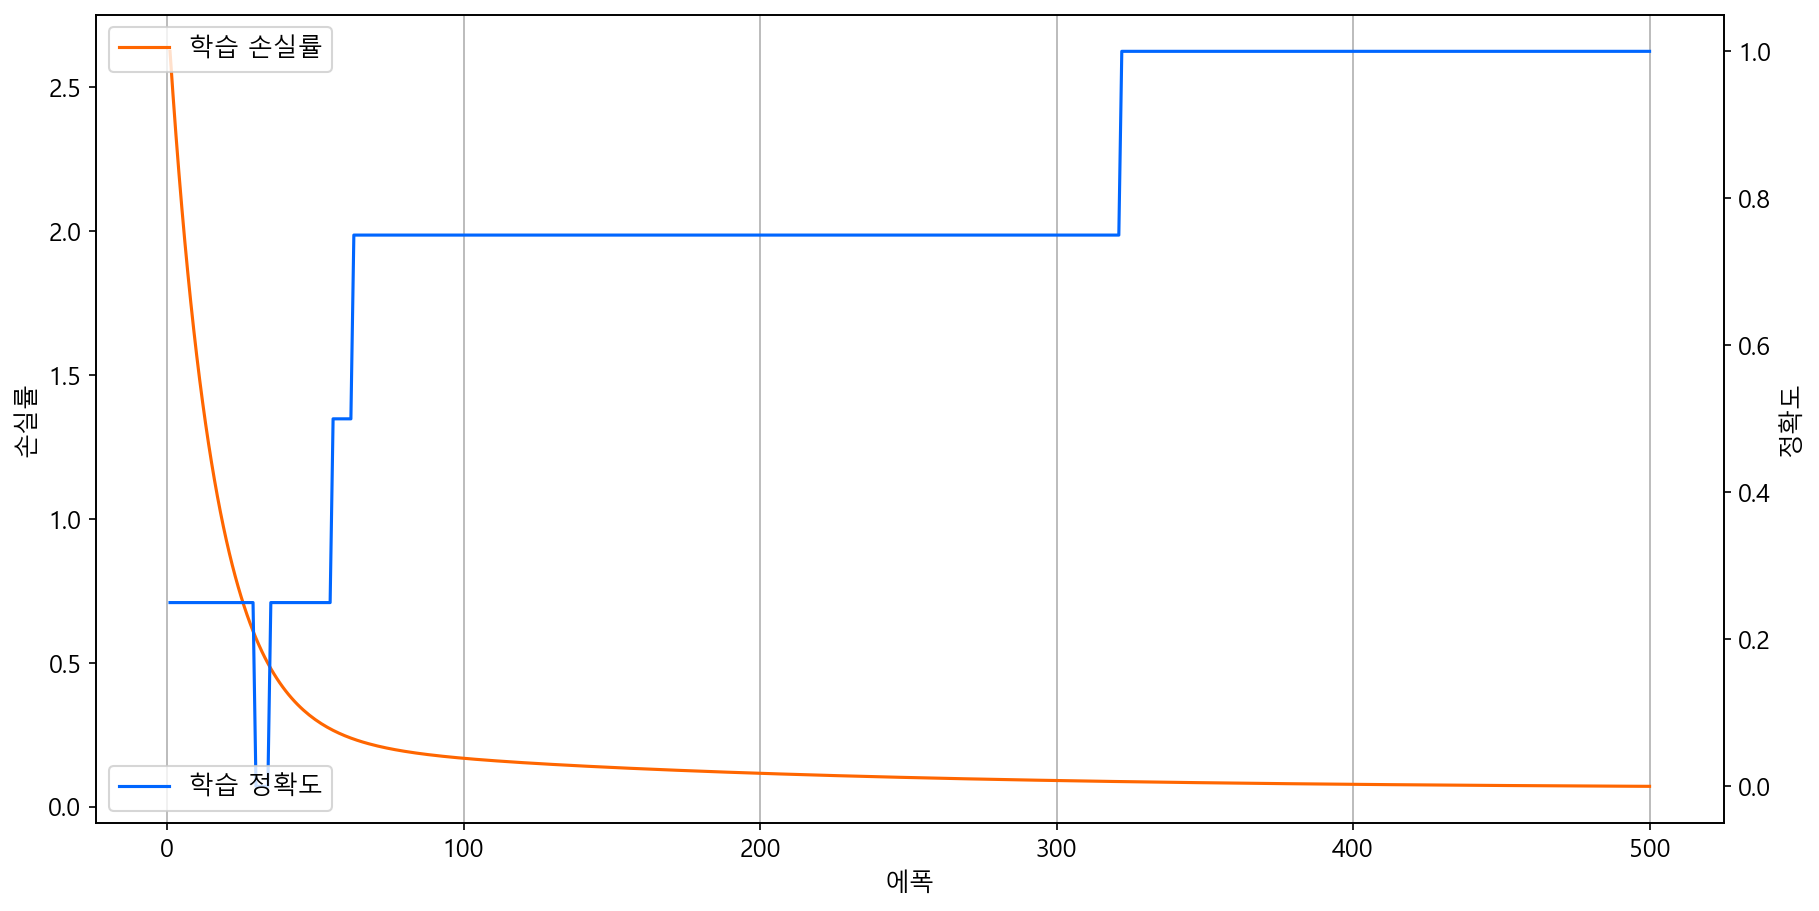

In [27]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data = result_of, x = result_of.index, y='loss', color = '#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data = result_of, x = result_of.index, y='acc', color = '#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc ='lower left')

plt.show()
plt.close()

모델 성능 평가

In [35]:
ev = mode.evaluate(tx, ty)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0]*100, ev[1]*100))

1/1 [==============================] - 0s 35ms/step - loss: 0.0703 - acc: 1.0000
손실률: 7.03%, 정확도: 100.00%


가중치, 편향 확인

In [29]:
weight, bias = mode.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.39491534 0.36561343]
편향: [0.39202306]


#### (8) 학습 결과 적용

단일 데이터에 대한 예측치 산정

In [30]:
r00 = mode.predict([[0,0]])
r00

1/1 [==============================] - 0s 47ms/step


array([[0.39202306]], dtype=float32)

In [31]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

학습 데이터 전체를 활용하여 에측값 만들기

In [33]:
r = mode.predict(train_x)
r

1/1 [==============================] - 0s 18ms/step


array([[0.39202306],
       [0.7869384 ],
       [0.7576365 ],
       [1.1525519 ]], dtype=float32)

In [34]:
of['예측값'] = r.reshape(-1).round()
of

y,x1,x2,예측값
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
1,1,1,1.0
